# 项目：分析电影时长的变化趋势和最受观众喜欢的电影类型

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介

1、探索电影时长的变化趋势；    
2、分析最受观众喜欢的电影类型；    
3、特别对于2015年的电影（最新的数据仅为2015年），分析观众最喜欢哪种类型。

In [2]:
import pandas as pd
% matplotlib inline
df = pd.read_csv('tmdb-movies.csv')

<a id='wrangling'></a>
## 数据整理



### 常规属性

In [3]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### 数据清理
1、去除无类型属性的行；    
2、去除重复的行。

In [5]:
df.dropna(subset=['genres'],inplace=True)

In [6]:
sum(df.duplicated())

1

In [7]:
df.drop_duplicates(inplace=True)

3、由于电影类型中，有些值存在好几个特征，需将这些特征分割开来，再进行统计    
3.1 新建一个新列，令每一行的电影类型中只存在一个特征；以“|”为分隔符将字符串进行分割，使用stack数据转置，最后重命名该列为genres。

In [10]:
genres_only = df['genres'].str.split('|',expand=True).stack().reset_index(level=1,drop=True).rename('genres')

3.2 删除原数据表df中的genres列，并使用join方法使其与保存在genres_only的genres列合并，保存为df_genres。

In [61]:
df_genres = df.drop('genres',axis=1).join(genres_only)

<a id='eda'></a>
## 探索性数据分析

> **提示**在你完成数据整理和清理之后，现在可以进行探索性数据分析了。你需要计算统计值，创建可视化图表，解决你在一开始的简介部分中提出的研究问题。我们推荐你采用系统化方法。一次只探索一个变量，然后探索变量之间的关系。

### 1、探索电影播放时长的变化趋势

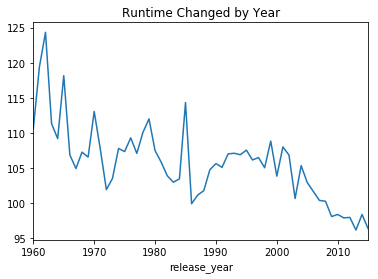

In [66]:
runtime_year = df.groupby('release_year').runtime.mean()
runtime_year.plot(x='release_year',kind='line',title='Runtime Changed by Year');

由上图可见，从1960年至今，电影的播放时长的趋势是逐渐变短的，由上世纪60年代平均播放时长近125分钟的高峰，下降至今平均时长低于100分钟。

### 2、分析观众最喜欢看哪种类型的电影（评分最高）

In [62]:
df_genres.shape

(26955, 21)

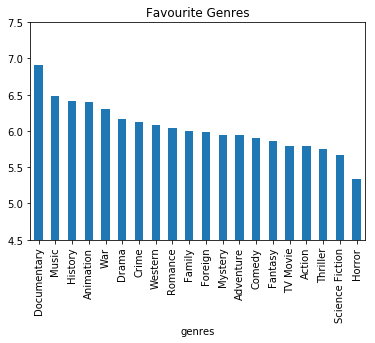

In [63]:
df_gen_mean = df_genres.groupby('genres').vote_average.mean().sort_values(ascending=False)
df_gen_mean.plot(kind='bar',ylim=(4.5,7.5),title='Favourite Genres');

由上图可见，对于1960年至2015年的电影,观众最喜欢看纪录片，其次为音乐剧和历史剧。

由于有些电影评分较高，但评分的人数较少；下表只对主流的电影进行统计（将评分人数大于100的电影定义为主流电影）；

In [58]:
df_genres.query('vote_count >= 100',inplace=True)
df_genres.shape

(1677, 21)

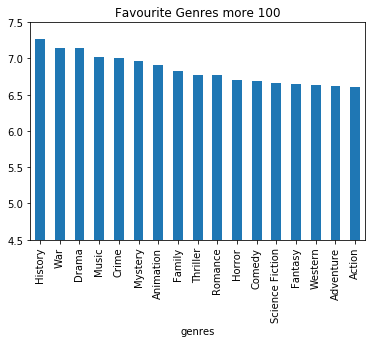

In [60]:
df_gen_mean = df_genres.groupby('genres').vote_average.mean().sort_values(ascending=False)
df_gen_mean.plot(kind='bar',ylim=(4.5,7.5),title='Favourite Genres more 100');

将评分人数小于100的电影剔除后，结果完全不同。对于主流电影，观众最喜欢看历史片，其次是战争片和剧情片。   
而且主流历史电影的平均评分较所有历史电影的平均评分高。

<a id='conclusions'></a>
## 结论
1、从1960年至2015年，电影的播放时长的趋势是逐渐变短的，由上世纪60年代平均播放时长近125分钟的高峰，下降至2015年平均时长低于100分钟；    
2、对于1960年至2015年的电影,观众最喜欢看纪录片，其次为音乐剧和历史剧；    
3、对于主流电影（将评分人数大于100的电影定义为主流电影），观众最喜欢看历史片，其次是战争片和剧情片；    
4、由于genres列是电影类型，当该值为空时，无法对电影类型进行分类，需将该值为空的行删除；    
5、由于有些电影评分较高，但评分的人数较少，将评分人数小于100的电影剔除后，结果差异较大；    
6、还缺少电影是否上映的数据，可以对已上映的主流电影进行统计；    

In [72]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295